# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px 
from textblob import TextBlob 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as pyo


# Reading Dataset

In [2]:
df = pd.read_csv('/content/netflix_titles.csv.zip')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Summary About Data

In [3]:
df.shape

(8807, 12)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Null Values Handling

In [8]:
df.shape

(8807, 12)

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### As Rajiv Cilaka is an Indian Directors who helmed the project of directing 'Chota Bheem', I have filled his country which were null values

 By this way also we can fill null values for some section of the data based on condition.

In [10]:
df.loc[df['director']=='Rajiv Chilaka', 'country'] = 'India'

## Droping rest of null values as we have abandance of data-points in out dataset.

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(5346, 12)

In [13]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Data analysis of netflix data
------------------------------************-------------------------------------

# Top-10 Content Ratings on Netflix

In [23]:
z = df.groupby(['rating']).size().reset_index(name='counts').sort_values('counts',ascending=False).head(10)
pieChart = px.pie(z, values='counts', names='rating', 
                  title='Distribution of Top-10 Content Ratings on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set3)

# pyo.iplot(pieChart)
pieChart.show()

# Top 10 Directors on Netflix

In [15]:
ad = df.groupby(['director']).agg(count=('show_id','count')).sort_values('count', ascending=False).head(10).reset_index()
fig1=px.bar(ad,x='count',y='director',title='Top 10 Directors on Netflix')
pyo.iplot(fig1)

# Top-10 Actors with most occurance on Netflix

In [16]:
lst=df['cast'].str.split(',',expand=True).stack()
lst=lst.to_frame()
lst.columns=['cast']
lst=lst.groupby(['cast']).size().reset_index(name='occurance')
lst=lst.sort_values('occurance', ascending=False)
fig2=px.bar(lst.head(10),x='cast',y='occurance', title='Top 10 Actors with most occurance on Netflix')
pyo.iplot(fig2)

# Trend of content produced over the years on Netflix

In [17]:
df1 = df[['type','release_year']]
df1=df1.groupby(['type','release_year']).size().reset_index(name='count')
df1=df1[df1['release_year']>=2010]
fig3 = px.line(df1, x="release_year", y="count", color='type',title='Trend of content produced over the years on Netflix')
pyo.iplot(fig3)

<Axes: xlabel='release_year', ylabel='d'>

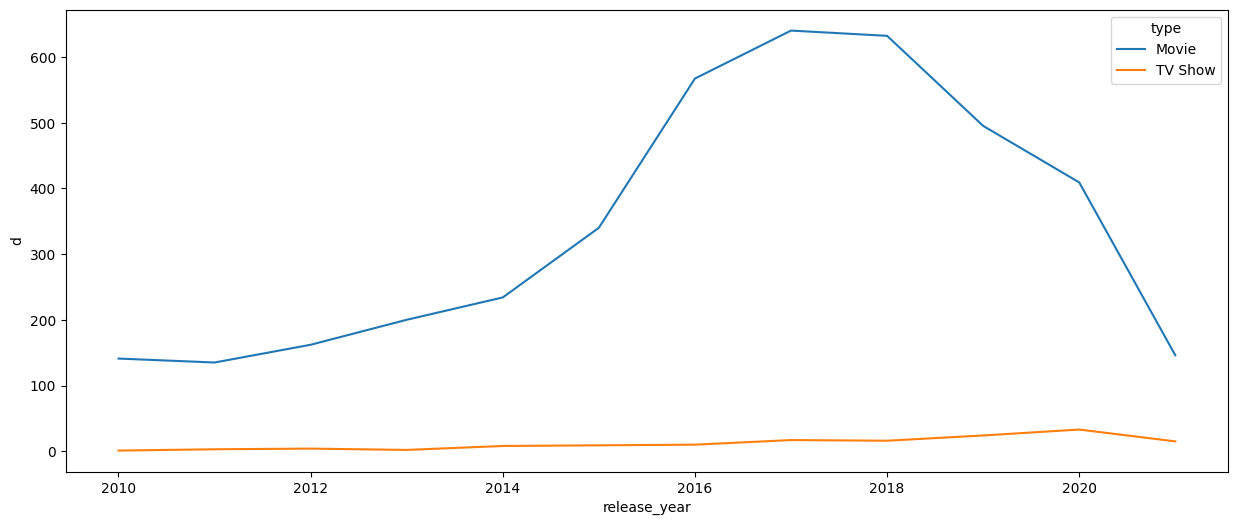

In [18]:
plt.figure(figsize=(15,6))
df1=df.groupby(['type','release_year']).agg(d=('release_year','count'))
df1=df1.reset_index()
df1=df1[df1['release_year']>=2010]
sns.lineplot(x='release_year', y='d', data=df1, hue='type')

## We can know the sentiments of a sentence by using below method.
## Now we have description columns and we will try to find the sentiment of that movie and also see how movies sentiments are changing over the years

In [19]:
z = 'my name is rahul singh. I am going to become a data analyst'
testimonial=TextBlob(z)
p=testimonial.sentiment.polarity

if p==0:
    sent='Neutral'
elif p>0:
    sent='Positive'
else:
    sent='Negative'

print(sent)

Neutral


# Sentiment of content on Netflix

In [20]:
dfx=df[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
pyo.iplot(fig4)

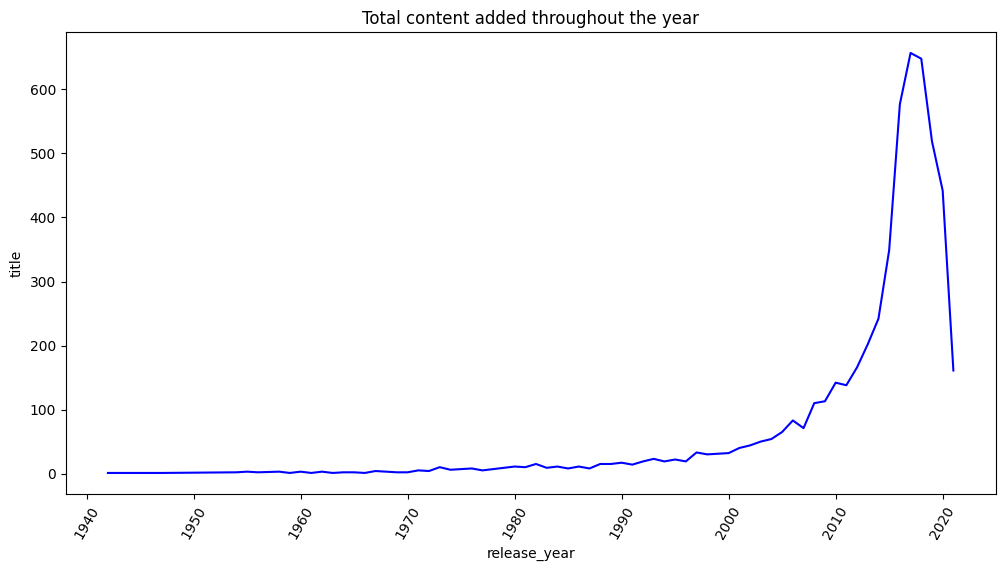

In [21]:
df_year = df.groupby(['release_year']).agg({'title':'nunique'}).reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(x='release_year',y = 'title',data=df_year,color = 'blue')
plt.xticks(rotation = 60)
plt.title('Total content added throughout the year')    
plt.show()

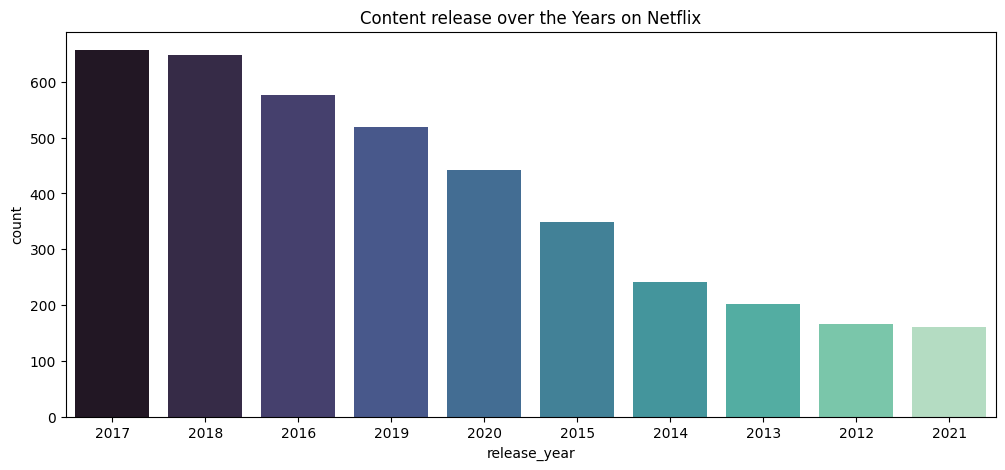

In [22]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'release_year',order = df['release_year'].value_counts().index[0:10],data = df,palette = 'mako')
plt.title('Content release over the Years on Netflix')
plt.show()

Rahul singh ( masai school ) 29_march_2023 Netfilx data Analysis Project